make some squrae synthetic friges using Airy formulae  



In [2]:
from pathlib import Path

import random
from PIL import Image, ImageFilter
import numpy as np

import matplotlib.pyplot as plt
import matplotlib


from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder
from ls_fringeapp import plot_helpers as ph
from ls_fringeapp import synthetic_images as si

Equipment Register loaded from /home/elfnor/gits/Length_Stds_Equipment_Register/register.xml
{'red': 632.991212579, 'green': 532.245576449053}


In [3]:
# make one image
ffrac_set = 0.25
a1, gb_yx = si.synthetic_image_with_gauge(
    111,
    0,
    ffrac_set,
    (800, 800),
    (600, 600),
)
ffrac_calc1 = fp.array2frac(a1, gb_yx, drawinfo=False)
a2 = si.blur_gauge_hole(a1, gb_yx)
ffrac_calc2, drawdata = fp.array2frac(
    a2,
    gb_yx,
    drawinfo=True,
    circle_radius=0.26,
    border=(0.1, 0.1),
)
ffrac_set, ffrac_calc1, ffrac_calc2

(0.25, np.float64(0.2525100873094504), np.float64(0.2524924820047003))

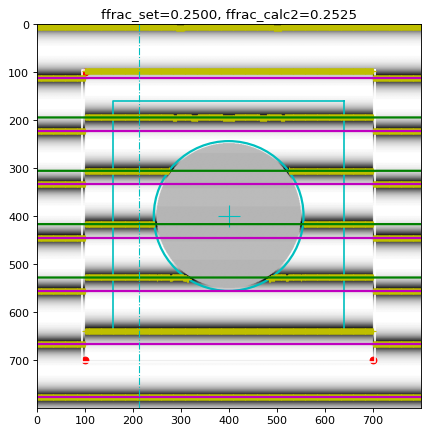

In [5]:
fig = plt.figure(figsize=(6, 6), dpi=80)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_title(f"{ffrac_set=:.4f}, {ffrac_calc2=:.4f}")
ph.draw_gauge(ax, a2, drawdata)

In [ ]:
# loop through random trials
n_tests = 50
ffracs2 = []
margin = 0.01

for i in range(n_tests):
    ffrac_set = random.uniform(0.0 + margin, 1.0 - margin)
    spacing = random.uniform(80, 120)
    offset = random.uniform(0, spacing)
    img_size = (int(random.uniform(750, 850)), int(random.uniform(750, 850)))
    gb_width = int(random.uniform(550, 650))
    gb_size = (gb_width, gb_width)

    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    a2 = si.blur_gauge_hole(a1, gb_yx, circle_radius=0.25)
    ffrac_calc2, drawdata = fp.array2frac(
        a2,
        gb_yx,
        drawinfo=True,
        circle_radius=0.26,
        border=(0.1, 0.1),
    )

    ffracs2.append(
        [
            spacing,
            offset,
            img_size[0],
            img_size[1],
            gb_size[0],
            gb_size[1],
            ffrac_set,
            ffrac_calc2,
        ],
    )

ffracs = np.array(ffracs2)
diff = ffracs[:, -1] - ffracs[:, -2]


In [9]:
print(f"{diff.shape=}")
print(f"{diff.mean()=}")
print(f"{diff.std(ddof=1)=}")
print(f"{diff.max()=}")
print(f"{diff.min()=}")

diff.shape=(50,)
diff.mean()=np.float64(-0.00021149926626424552)
diff.std(ddof=1)=np.float64(0.0033442994838525615)
diff.max()=np.float64(0.006568080917175312)
diff.min()=np.float64(-0.005448800529976344)
